[Kaggle - Titanic - Tabular data - Binary Classification](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("./input/raw/train.csv")
df_test = pd.read_csv("./input/raw/test.csv")

# identify target value
target_col = ['Survived']

# drop useless columns
df_train = df_train.drop('PassengerId', axis=1)
df_test = df_test.drop('PassengerId', axis=1)

# convert to categorical feature
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_test['Pclass'] = df_test['Pclass'].astype('category')

print('Training set:')
display(df_train.head())
print(df_train.shape)
df_train.info()
display(df_train.describe())

print('------------------------------------------------------------------------------------------------------------------')

print('\nTesting set:')
display(df_test.head())
print(df_test.shape)
df_test.info()
display(df_test.describe())

Training set:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null category
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 70.7+ KB


,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


------------------------------------------------------------------------------------------------------------------

Testing set:


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null category
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 30.0+ KB


,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


* training & testing set have similar distribution.
* target values have low skewness

__Look fine!__

---

# 1) Data Cleaning
* train: Age (mean), Cabin(drop whole column, too many nulls), Embarked(mode)
* test: Age, Cabin, Fare(median)

In [3]:
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

df_train = df_train.fillna({'Age':      df_train['Age'].mean(),
                            'Embarked': df_train['Embarked'].mode()[0]})
df_test = df_test.fillna(  {'Age':      df_train['Age'].mean(),
                            'Fare':     df_train['Fare'].median()})

display(df_train.isna().sum())
display(df_test.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

---

# 2) Feature Engineering

## 1) drop Ticket (cannot see any matching patterns in Ticket in both training & testing set)

In [4]:
display(df_train['Ticket'].value_counts().nlargest(10))
print('No. of unique values = {} out of {}'.format(df_train['Ticket'].nunique(), len(df_train['Ticket'])))

347082          7
1601            7
CA. 2343        7
CA 2144         6
3101295         6
347088          6
382652          5
S.O.C. 14879    5
4133            4
17421           4
Name: Ticket, dtype: int64

No. of unique values = 681 out of 891


In [5]:
display(df_test['Ticket'].value_counts().nlargest(10))
print('No. of unique values = {} out of {}'.format(df_test['Ticket'].nunique(), len(df_test['Ticket'])))

PC 17608              5
113503                4
CA. 2343              4
SOTON/O.Q. 3101315    3
16966                 3
C.A. 31029            3
347077                3
PC 17483              3
220845                3
13050                 2
Name: Ticket, dtype: int64

No. of unique values = 363 out of 418


In [6]:
df_train = df_train.drop('Ticket', axis=1)
df_test = df_test.drop('Ticket', axis=1)

In [7]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## 2a) Extract Title from Name

In [8]:
def getTitle (series):
    '''Extract title from name'''
    
    return series.str.split(', ', expand=True)[1].str.split(' ', expand=True)[0]

In [9]:
df_train['Title'] = getTitle(df_train['Name'])
df_test['Title'] = getTitle(df_test['Name'])

In [10]:
display(df_train['Title'].value_counts())
display(df_test['Title'].value_counts())

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Ms.            1
the            1
Capt.          1
Mme.           1
Jonkheer.      1
Don.           1
Lady.          1
Sir.           1
Name: Title, dtype: int64

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rev.         2
Col.         2
Dona.        1
Ms.          1
Dr.          1
Name: Title, dtype: int64

## 2b) Convert rare titles to 'others'

In [11]:
def convertTitle (df, n):
    '''Convert titles occuring less than n times to "other" '''
    
    raretitle = df['Title'].value_counts() < n
    return df['Title'].apply(lambda x: 'other' if raretitle.loc[x]==True else x)

In [12]:
df_train['Title'] = convertTitle(df_train, 10)
df_test['Title'] = convertTitle(df_test, 10)

display(df_train['Title'].value_counts())
display(df_test['Title'].value_counts())

Mr.        517
Miss.      182
Mrs.       125
Master.     40
other       27
Name: Title, dtype: int64

Mr.        240
Miss.       78
Mrs.        72
Master.     21
other        7
Name: Title, dtype: int64

In [13]:
# Drop Name column
df_train = df_train.drop('Name', axis=1)
df_test = df_test.drop('Name', axis=1)

In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


## 3) Check feature correlation

In [15]:
# Separate numerical continuous features & categorical features

num_col = ['Age', 'SibSp', 'Parch', 'Fare']
cat_col = [col for col in df_train.columns if col not in num_col + target_col]

print('num_col:', num_col)
print('cat_col:', cat_col)

num_col: ['Age', 'SibSp', 'Parch', 'Fare']
cat_col: ['Pclass', 'Sex', 'Embarked', 'Title']


In [16]:
corr = df_train[num_col].corr()

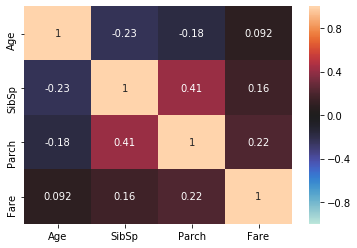

In [17]:
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            center=0,
            annot=True)

**SibSp & Parch have low correlation -> may combine into one feature (Familysize)** 

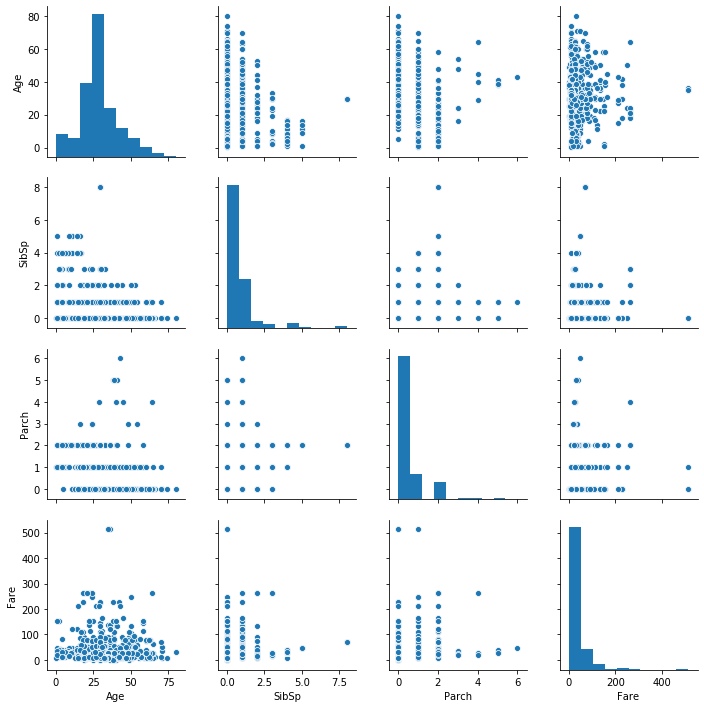

In [18]:
sns.pairplot(df_train, vars=num_col)
plt.show()

**There is no linear correlated features -> do not need to delete linear correlated features**

By Survived:


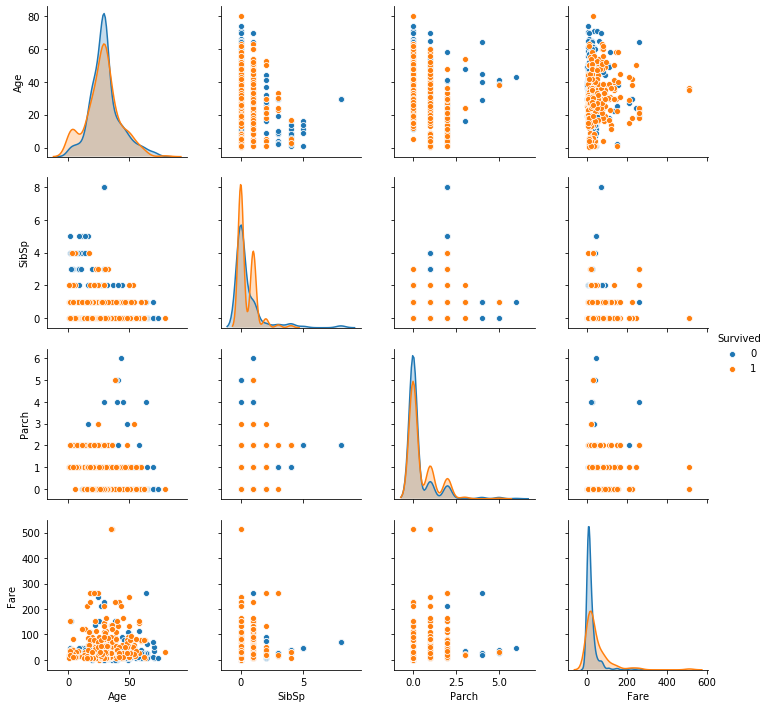

In [19]:
print('By Survived:')
sns.pairplot(df_train, vars=num_col, hue='Survived')
plt.show()

**Age, SibSp, Fare seem to have impact to target values**

---

# 3) Data Preprocessing
* num_col: Standardscaler
* cat_col: OneHotEncoder

In [20]:
from sklearn.preprocessing import StandardScaler

df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

scaler = StandardScaler()
df_train_scaled[num_col] = scaler.fit_transform(df_train[num_col])
df_test_scaled[num_col] = scaler.transform(df_test[num_col])

In [21]:
# onehot encoded & combined with scaled df 

df_train_combined = pd.concat([df_train_scaled,
                             pd.get_dummies(df_train[cat_col])], axis=1)\
                                .drop(cat_col, axis=1)

df_test_combined = pd.concat([df_test_scaled,
                             pd.get_dummies(df_test[cat_col])], axis=1)\
                                .drop(cat_col, axis=1)

display(df_train_combined.head())
print(df_train_combined.shape)
display(df_test_combined.head())
print(df_test_combined.shape)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other
0,0,-0.592481,0.432793,-0.473674,-0.502445,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,0.638789,0.432793,-0.473674,0.786845,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,0.407926,0.432793,-0.473674,0.420730,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0.407926,-0.474545,-0.473674,-0.486337,0,0,1,0,1,0,0,1,0,0,1,0,0


(891, 18)


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other
0,0.369449,-0.474545,-0.473674,-0.490783,0,0,1,0,1,0,1,0,0,0,1,0,0
1,1.331378,0.432793,-0.473674,-0.507479,0,0,1,1,0,0,0,1,0,0,0,1,0
2,2.485693,-0.474545,-0.473674,-0.453367,0,1,0,0,1,0,1,0,0,0,1,0,0
3,-0.207709,-0.474545,-0.473674,-0.474005,0,0,1,0,1,0,0,1,0,0,1,0,0
4,-0.592481,0.432793,0.767630,-0.401017,0,0,1,1,0,0,0,1,0,0,0,1,0


(418, 17)


---

# Finally, save preprocessed csv

In [23]:
# Split features & target value from training set

df_train_combined.to_csv('./input/df_train_combined.csv', index=False)
df_test_combined.to_csv('./input/df_test_combined.csv', index=False)